In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from glob import glob


import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
def get_max_frequency(file_path):
    y, sr = librosa.load(file_path)
    # Compute the short-time Fourier transform
    D = np.abs(librosa.stft(y))
    # Compute the frequency range
    freqs = librosa.fft_frequencies(sr=sr)
    # Compute the average power spectral density
    avg_psd = np.mean(librosa.amplitude_to_db(D, ref=np.max), axis=1)
    # Find the frequency with the maximum power spectral density
    max_freq = freqs[np.argmax(avg_psd)]
    return max_freq

def calculate_average(frequency: float):
    # Calculate the average of the highest frequencies
    avg_max_freq = np.mean(frequency)
    print(f"Average highest frequency: {avg_max_freq} Hz")

    # Suggest a sample rate (double the average highest frequency, rounded up to nearest standard rate)
    suggested_sample_rate = int(np.ceil(avg_max_freq * 2 / 1000) * 1000)
    print(f"Suggested sample rate: {suggested_sample_rate} Hz")


In [7]:

audio_files = glob('/Users/jaimacabangon/Downloads/slider_0db/*/*/*.wav')

In [14]:
print(len(audio_files), audio_files[0])

4094 ./slider/id_00/abnormal/00000059.wav


In [13]:
# Abnormal sound
ipd.Audio(audio_files[0])

#### Y = Raw Value
#### Sample Rate

In [18]:
y, sample_rate = librosa.load(audio_files[0])
print(f'Raw data (10): {y[:10]}')
print(f'Raw data shape: {y.shape}')
print(f'Sample Rate: {sample_rate}')

Raw data (10): [ 0.00108272  0.00056277 -0.00039079 -0.00042795 -0.00012456 -0.00015061
 -0.0001389   0.00012191  0.00058226  0.00111747]
Raw data shape: (220500,)
Sample Rate: 22050


### Raw Audio sample (No Fourier Transform)

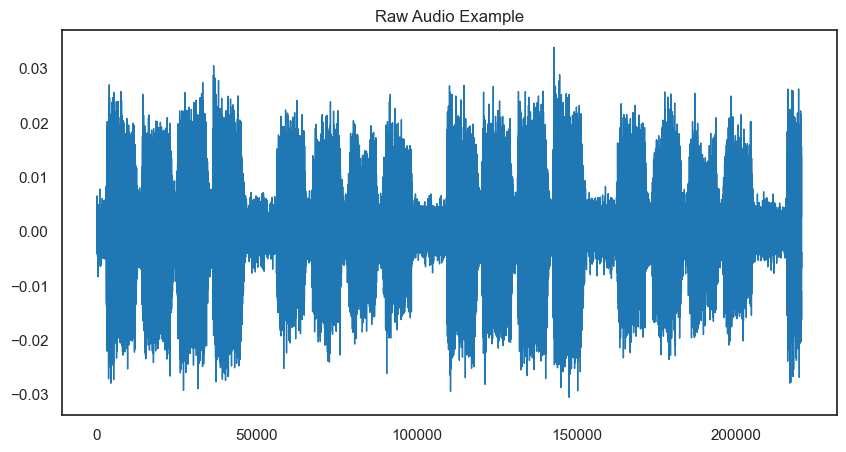

In [19]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

### Zoomed in view 100000 <-> 150000

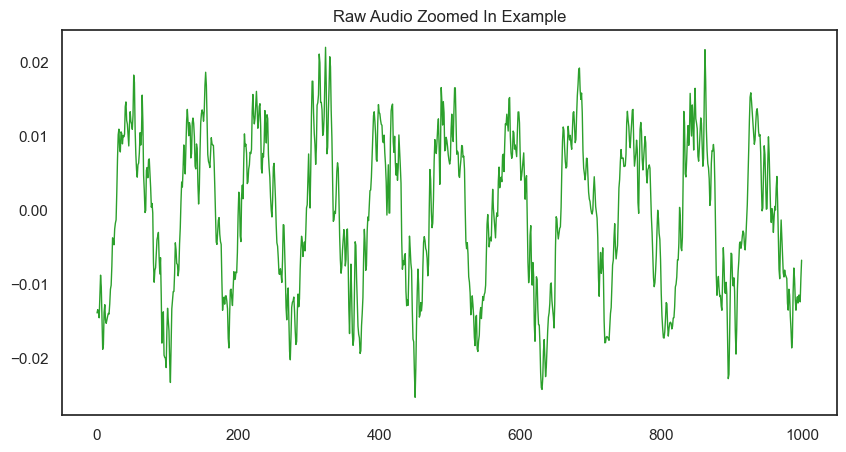

In [26]:
pd.Series(y[149000:150000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [29]:
test = "./slider/id_00/abnormal/00000059.wav"
new = test.split('/')
print(new)

['.', 'slider', 'id_00', 'abnormal', '00000059.wav']


In [30]:
raw_data_list = [] 
sample_rate_list = []
sound_source_list = [] 
binary_classification_list = [] 
wav_file_list = [] 

for audio_file in audio_files:
    split_string = str(audio_file).split('/')
    sound_source = split_string[1]
    binary_classification = split_string[3]
    wav_file = split_string[4]
    raw_data, sample_rate = librosa.load(audio_file)
    sound_source_list.append(sound_source)
    binary_classification_list.append(binary_classification)
    wav_file_list.append(wav_file)
    raw_data_list.append(raw_data)
    sample_rate_list.append(sample_rate)


    

In [32]:
df = pd.DataFrame(columns=["Sound Source", "Classification", ".wav File", "Sample Rate", "Raw Data"])

In [34]:
df["Sound Source"] = sound_source_list
df["Classification"] = binary_classification_list
df[".wav File"] = wav_file_list
df["Sample Rate"] = sample_rate_list
df["Raw Data"] = raw_data_list

In [36]:
df.head()

,Sound Source,Classification,.wav File,Sample Rate,Raw Data
0,slider,abnormal,00000059.wav,22050,"[0.0010827219, 0.0005627736, -0.00039078962, -..."
1,slider,abnormal,00000071.wav,22050,"[0.0043573375, 0.004331531, 0.007012328, 0.006..."
2,slider,abnormal,00000065.wav,22050,"[0.0023961815, 0.0029754688, 0.0029744667, 0.0..."
3,slider,abnormal,00000273.wav,22050,"[-0.0067102555, -0.006805369, -0.0066032447, -..."
4,slider,abnormal,00000267.wav,22050,"[-0.0024271917, -0.0025318416, -0.0024301421, ..."


In [56]:
df['Mean'] = df['Raw Data'].apply(np.mean)

In [57]:
df['Standard Deviation'] = df['Raw Data'].apply(np.std)
df['Max Value'] = df['Raw Data'].apply(np.max)
df['Min Value'] = df['Raw Data'].apply(np.min)

In [58]:
df.head()

,Sound Source,Classification,.wav File,Sample Rate,Raw Data,Mean,Standard Deviation,Max Value,Min Value
0,slider,abnormal,00000059.wav,22050,"[0.0010827219, 0.0005627736, -0.00039078962, -...",-8.520666e-08,0.007337,0.033874,-0.030563
1,slider,abnormal,00000071.wav,22050,"[0.0043573375, 0.004331531, 0.007012328, 0.006...",1.075607e-06,0.007325,0.029301,-0.030559
2,slider,abnormal,00000065.wav,22050,"[0.0023961815, 0.0029754688, 0.0029744667, 0.0...",4.846290e-07,0.007298,0.028844,-0.029086
3,slider,abnormal,00000273.wav,22050,"[-0.0067102555, -0.006805369, -0.0066032447, -...",-3.045778e-07,0.007616,0.029548,-0.032389
4,slider,abnormal,00000267.wav,22050,"[-0.0024271917, -0.0025318416, -0.0024301421, ...",-5.204175e-07,0.007541,0.029990,-0.034477


In [59]:
df.loc[0]

Sound Source                                                     slider
Classification                                                 abnormal
.wav File                                                  00000059.wav
Sample Rate                                                       22050
Raw Data              [0.0010827219, 0.0005627736, -0.00039078962, -...
Mean                                                               -0.0
Standard Deviation                                             0.007337
Max Value                                                      0.033874
Min Value                                                     -0.030563
Name: 0, dtype: object

In [60]:
df["Classification"].value_counts()

Classification
normal      3204
abnormal     890
Name: count, dtype: int64

In [61]:
df.describe()

,Sample Rate,Mean,Standard Deviation,Max Value,Min Value
count,4094.0,4.094000e+03,4094.000000,4094.000000,4094.000000
mean,22050.0,-1.978628e-07,0.004474,0.024737,-0.024032
std,0.0,1.445499e-06,0.001380,0.007295,0.007919
min,22050.0,-5.541529e-06,0.002508,0.013050,-0.079679
25%,22050.0,-1.054891e-06,0.003622,0.019636,-0.026728
50%,22050.0,-2.044112e-07,0.004036,0.023441,-0.021965
75%,22050.0,6.701561e-07,0.005118,0.027462,-0.018687
max,22050.0,5.940924e-06,0.011507,0.068562,-0.013443


In [62]:
df["Classification"].describe()

count       4094
unique         2
top       normal
freq        3204
Name: Classification, dtype: object

### Data taken at consistent sample rate of 22050
### Abnormal vs normal samples are not 50:50
#### Normal % = 78.3%
#### Abnormal % = 21.7%


### Given Sample rate is consistent, reducing sample rate is not recommended as we could lose audio quality. 

In [49]:
df["Classification"] == "abnormal"

0        True
1        True
2        True
3        True
4        True
        ...  
4089    False
4090    False
4091    False
4092    False
4093    False
Name: Classification, Length: 4094, dtype: bool

In [51]:
df.loc[0]

Sound Source                                                 slider
Classification                                             abnormal
.wav File                                              00000059.wav
Sample Rate                                                   22050
Raw Data          [0.0010827219, 0.0005627736, -0.00039078962, -...
Name: 0, dtype: object

In [52]:
df.loc[4089]

Sound Source                                                 slider
Classification                                               normal
.wav File                                              00000068.wav
Sample Rate                                                   22050
Raw Data          [0.008623881, 0.008971801, 0.0059844865, 0.005...
Name: 4089, dtype: object

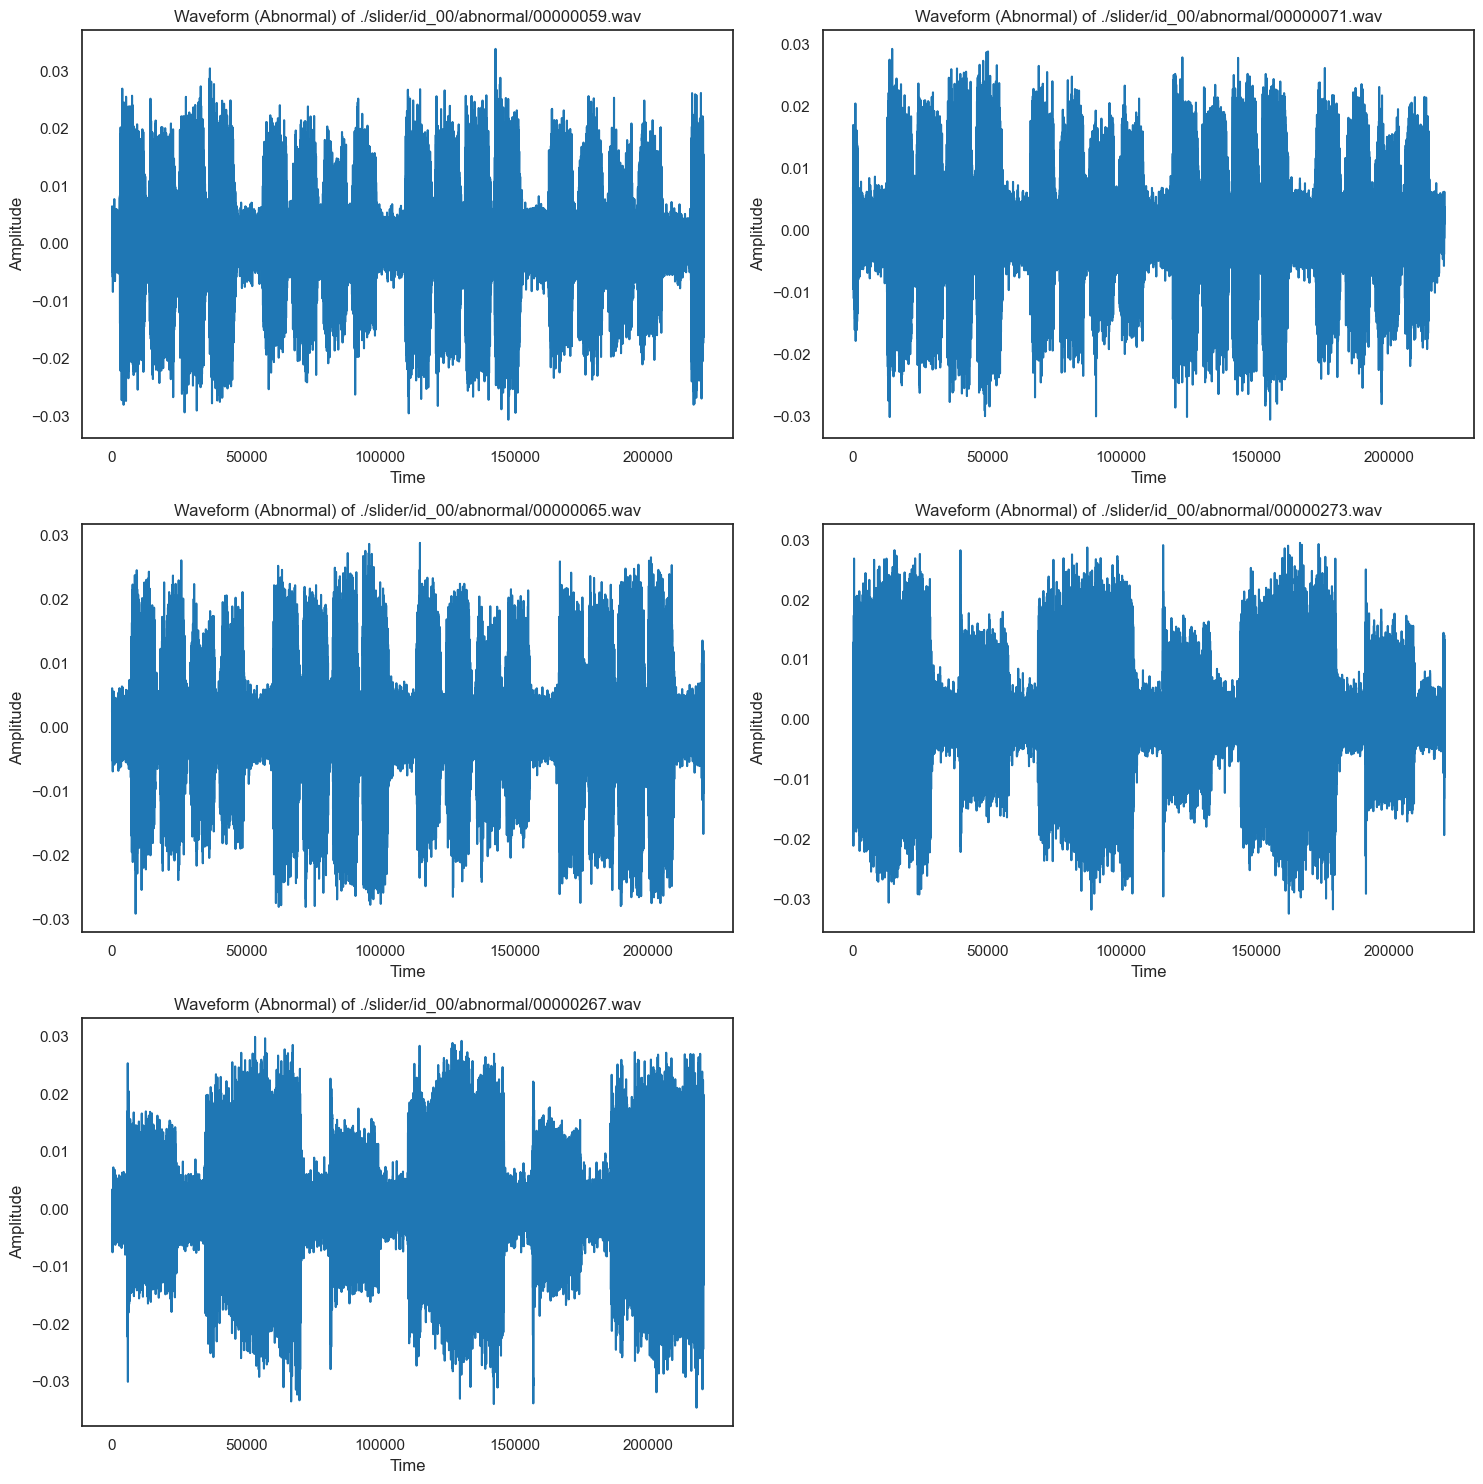

In [54]:
# Number of audio files
num_files = len(audio_files[0:5])

# Calculate the number of rows and columns for subplots
rows = (num_files + 1) // 2
cols = 2

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the audio files and plot each one
for i, file in enumerate(audio_files[0:5]):
    # Load the audio file
    y, sample_rate = librosa.load(file)
    
    # Plot the waveform
    axs[i].plot(y)
    axs[i].set_title(f'Waveform (Abnormal) of {file}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

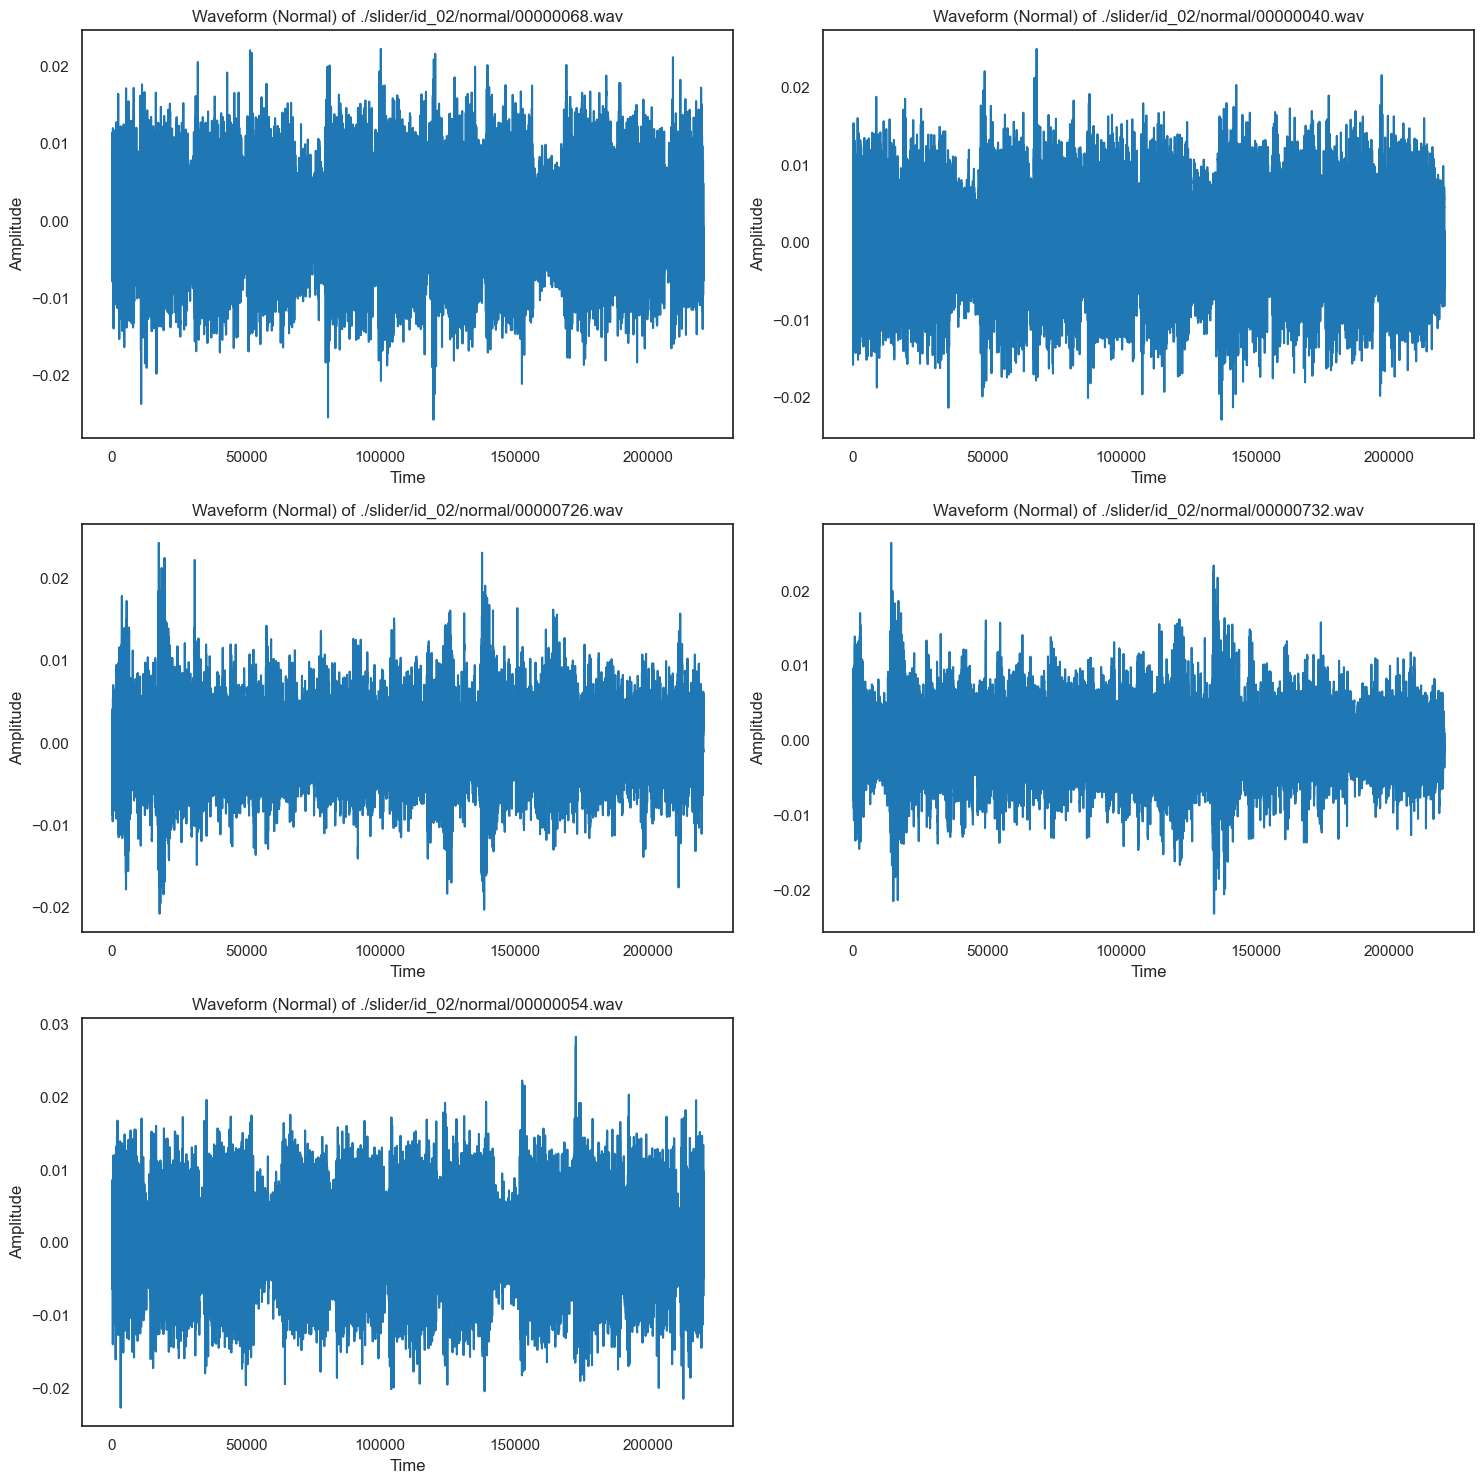

In [55]:
# Number of audio files
num_files = len(audio_files[4089:4094])

# Calculate the number of rows and columns for subplots
rows = (num_files + 1) // 2
cols = 2

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the audio files and plot each one
for i, file in enumerate(audio_files[4089:4094]):
    # Load the audio file
    y, sample_rate = librosa.load(file)
    
    # Plot the waveform
    axs[i].plot(y)
    axs[i].set_title(f'Waveform (Normal) of {file}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()